Done By: Dhruv Verma

Registration Number: 21BAI1367

E-mail:Dhruv.verma2021a@vitstudent.ac.in

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/dataset

/content/gdrive/My Drive/dataset


In [4]:
# Load the dataset
data = pd.read_csv('Mall_Customers.csv')  # Replace with the actual file path


In [5]:
# Task 1: Understand the data
# Display the first few rows of the dataset to get a sense of its structure
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Task 2: Data Preprocessing
# Perform data preprocessing steps (e.g., handling missing values, encoding categorical variables)
# You may need to convert categorical variables to numerical using techniques like one-hot encoding

# Standardize the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [7]:
# Task 3: Machine Learning approach with clustering algorithm (K-Means)
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

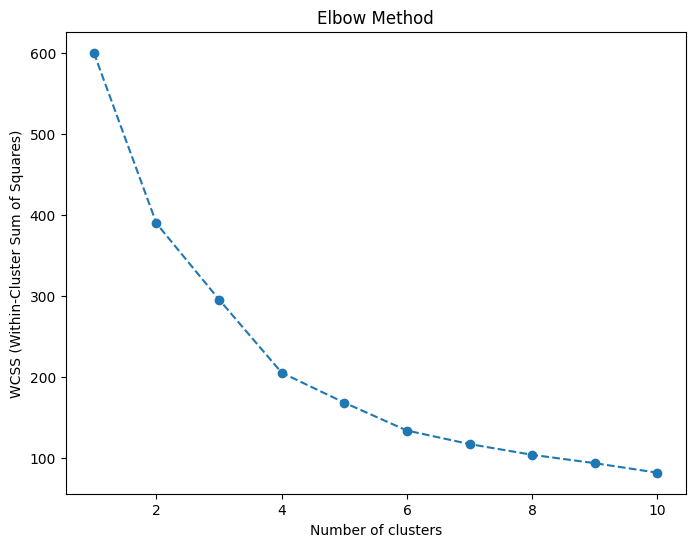

In [8]:
# Plot the Elbow Method graph to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [9]:
# Based on the Elbow Method, choose an appropriate number of clusters
k = 5  # You can adjust this based on the plot above


In [10]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_data)


In [11]:
# Add cluster labels to the original dataset
data['Cluster'] = clusters

In [12]:
# Task 4: Analyze the results and extract insights
# You can analyze the clusters to gain insights about customer segments
# For example, you can compute cluster statistics or visualize the clusters using PCA

# Principal Component Analysis (PCA) for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

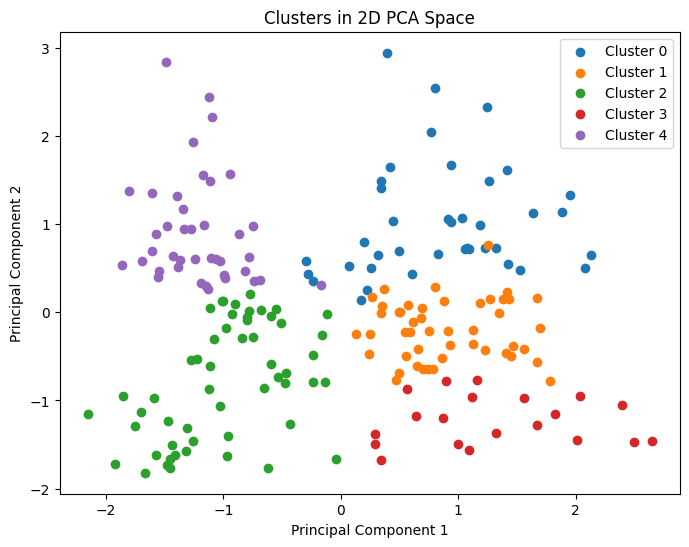

In [13]:
# Create a DataFrame for the PCA components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Plot clusters in 2D using PCA
plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(pca_df[pca_df['Cluster'] == cluster]['PC1'], pca_df[pca_df['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()